In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']

In [16]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self, b0 = 0, b1 = 0):
        self.b0 = b0
        self.b1 = b1
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму.

In [14]:
e= []
for i in range(10):
  b0 = np.random.normal(0,50)
  b1 = np.random.normal(0,50)
  hyp = Model(b0 = b0, b1 = b1)
  steps,erors = hyp.fit(x,y)
  j = hyp.error(x,y)
  print(f'Model {i}, error = {j}, b0 = {hyp.b0}, b1 = {hyp.b1}')


Model 0, error = 3.758941765244276e-09, b0 = -8.102869789374934e-05, b1 = 69.1876733781403
Model 1, error = 2.0616912555502077e-10, b0 = 1.9268051822322688e-05, b1 = 69.18771964127636
Model 2, error = 2.9517967987245643e-10, b0 = 2.2967154214430748e-05, b1 = 69.18772147031622
Model 3, error = 1.7721130499004074e-09, b0 = -5.583034604329229e-05, b1 = 69.1876857105207
Model 4, error = 2.3728641000679536e-12, b0 = -1.9389433855635902e-06, b1 = 69.1877102635337
Model 5, error = 3.4106901340822083e-10, b0 = -2.4265358800839136e-05, b1 = 69.18769964828614
Model 6, error = 2.18021080086428e-10, b0 = 1.952277007925848e-05, b1 = 69.18772053303107
Model 7, error = 6.656851752611048e-11, b0 = -1.0687946164998902e-05, b1 = 69.18770614082295
Model 8, error = 8.859968895430768e-10, b0 = 3.9462988585728574e-05, b1 = 69.18772958591377
Model 9, error = 1.4488501693720929e-12, b0 = 1.6739198109020321e-06, b1 = 69.18771191017656


Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

In [17]:
alpha = [0.000000001, 0.000001, 0.001, 0.01, 0.1, 0.25, 0.5, 1, 1.25, 1.5, 1.52]
er = []
for lr in alpha:
  hyp = Model()
  steps, errors = hyp.fit(x, y, alpha = lr)
  J = hyp.error(x, y)
  er.append(J)
  print('*'*30)
  print(f"Learning rate {lr}")
  print(f"First 5 error after gradient descent: {errors[:5]}")
  print(f"Last 5 error after gradient descent: {errors[-5:]}")
  print('*'*30)

******************************
Learning rate 1e-09
First 5 error after gradient descent: [2937.644602219114, 2937.644594922889, 2937.644587626663, 2937.6445803304387, 2937.644573034213]
Last 5 error after gradient descent: [2937.571677360266, 2937.5716700642242, 2937.5716627681813, 2937.571655472139, 2937.571648176097]
******************************
******************************
Learning rate 1e-06
First 5 error after gradient descent: [2937.637313294546, 2937.6300170920404, 2937.622720907826, 2937.6154247419013, 2937.6081285942646]
Last 5 error after gradient descent: [2865.617599148106, 2865.610483461165, 2865.603367792058, 2865.596252140784, 2865.5891365073458]
******************************
******************************
Learning rate 0.001
First 5 error after gradient descent: [2930.352956509933, 2923.079569868531, 2915.8244035059333, 2908.5874114538433, 2901.368547860564]
Last 5 error after gradient descent: [2.7979569701484846e-06, 2.792696726852265e-06, 2.7874463808371797e-06,

Модифицируйте код модели таким образом, чтобы он корректно работал как с Series, так и с DataFrame. При этом, конечно, датафрейм не должен содержать "лишних" столбцов.

In [19]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1
    def predict(self, X = np.zeros(10), df = pd.DataFrame()):
        X = X
        if len(df.columns) == 2:
          X = df.iloc[:,0]
        return self.b0 + self.b1 * X
    def error(self, X = np.zeros(10), Y = np.zeros(10), df = pd.DataFrame()):
        X = X
        Y = Y
        if len(df.columns) == 2:
          X = df.iloc[:,0]
          Y = df.iloc[:,1]
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X = np.zeros(10), Y = np.zeros(10), df = pd.DataFrame(), alpha=0.001, accuracy=0.01, max_steps=5000):
        X = X
        Y = Y
        if len(df.columns) == 2:
          X = df.iloc[:,0]
          Y = df.iloc[:,1]
        steps, errors = [], []
        step = 0
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [20]:
b = 0.1
df = pd.DataFrame({'x': np.linspace(-2,4,20), 'y': np.linspace(-2,4,20) + b + np.random.normal(0,0.1,20)})
hyp = Model()
steps1, errors1 = hyp.fit(df=df)
J1 = hyp.error(df = df)
print("error after gradient descent:", J1)
print("*"*100)
hyp2 = Model()
steps2, errors2 = hyp2.fit(df.iloc[:,0], df.iloc[:,1])
J2 = hyp.error(df.iloc[:,0], df.iloc[:,1])
print("error after gradient descent:", J2)

error after gradient descent: 0.005616882627183773
****************************************************************************************************
error after gradient descent: 0.005616882627183773


Модифицируйте алгоритм градиентного спука таким образом, чтобы он останавливаля, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например.

In [35]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1
    def predict(self, X = np.zeros(10), df = pd.DataFrame()):
        X = X
        if len(df.columns) == 2:
          X = df.iloc[:,0]
        return self.b0 + self.b1 * X
    def error(self, X = np.zeros(10), Y = np.zeros(10), df = pd.DataFrame()):
        X = X
        Y = Y
        if len(df.columns) == 2:
          X = df.iloc[:,0]
          Y = df.iloc[:,1]
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X = np.zeros(10), Y = np.zeros(10), df = pd.DataFrame(), alpha=0.001, accuracy=0.000001, max_steps=5000):
        X = X
        Y = Y
        if len(df.columns) == 2:
          X = df.iloc[:,0]
          Y = df.iloc[:,1]
        steps, errors = [], []
        step = 0
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            step += 1



            if _ > 1:
              delta = errors[-1] - new_err

              if delta < accuracy:
                break

            if _ % 1000 == 0:
              print(f'error: {new_err},')
              if _ > 0:
                print(f'delta: {delta}\n')

            steps.append(step)
            errors.append(new_err)

        return steps, errors

In [36]:
b = 0.1
df = pd.DataFrame({'x': np.linspace(-2,4,20), 'y': np.linspace(-2,4,20) + b + np.random.normal(0,0.1,20)})
hyp = Model()
steps1, errors1 = hyp.fit(df=df, accuracy = 0.000000001)
J1 = hyp.error(df = df)
print("error after gradient descent:", J1)
print("Обучение остановлено на итерации: ", len(steps1))
print("*"*100)
hyp2 = Model()
steps2, errors2 = hyp2.fit(df.iloc[:,0], df.iloc[:,1], accuracy = 0.000001)
J2 = hyp2.error(df.iloc[:,0], df.iloc[:,1])
print("error after gradient descent:", J2)
print("Обучение остановлено на итерации: ", len(steps2))

error: 2.289718739070568,
error: 0.005614353609565727,
delta: 5.376667467941673e-06

error: 0.0036587711151110113,
delta: 7.712929679598926e-07

error: 0.003251071310848396,
delta: 1.8195365469441532e-07

error: 0.0031548710020491578,
delta: 4.293594177071092e-08

error: 0.003132170434447232,
delta: 1.0131675083971392e-08

error: 0.003126813738734844,
delta: 2.3907904566668192e-09

error after gradient descent: 0.003125850911450062
Обучение остановлено на итерации:  6604
****************************************************************************************************
error: 2.289718739070568,
error: 0.005614353609565727,
delta: 5.376667467941673e-06

error after gradient descent: 0.0038162569852871905
Обучение остановлено на итерации:  1821


Реализуйте механизм адаптивной скорости обучения. Чтобы не задавать вручную параметр alpha можно отслеживать, увеличивается ли ошибка после первого шага градиентного спуска. В начале задаем скорость обучения близкой к 1. Если ошибка после одного шага увеличивается - скорость обучения надо уменьшить (например, в 2 раза). Если не увеличивается - скорость обучения можно не трогать. Еще подумайте, как после уменьшения скорости перезапускать градиентный спуск заново.

In [37]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1
    def predict(self, X = np.zeros(10), df = pd.DataFrame()):
        X = X
        if len(df.columns) == 2:
          X = df.iloc[:,0]
        return self.b0 + self.b1 * X
    def error(self, X = np.zeros(10), Y = np.zeros(10), df = pd.DataFrame()):
        X = X
        Y = Y
        if len(df.columns) == 2:
          X = df.iloc[:,0]
          Y = df.iloc[:,1]
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X = np.zeros(10), Y = np.zeros(10), df = pd.DataFrame(), alpha=0.001, accuracy=0.000001, max_steps=5000):
        X = X
        Y = Y
        if len(df.columns) == 2:
          X = df.iloc[:,0]
          Y = df.iloc[:,1]
        steps, errors = [], []
        step = 0
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            step += 1



            if _ > 1:
              delta = errors[-1] - new_err

              if delta < 0:
                alpha *= 0.5

              if delta < accuracy:
                break

            if _ % 1000 == 0:
              print(f'error: {new_err},')
              if _ > 0:
                print(f'delta: {delta}\n')

            steps.append(step)
            errors.append(new_err)

        return steps, errors

error: 2930.352956509933,
error: 252.5244210571546,
delta: 0.6098728068264165

error: 23.78874237781962,
delta: 0.0549648395912854

error: 2.5137478737999226,
delta: 0.005501972585611803

error: 0.2991966090645402,
delta: 0.0006212774379573127

error: 0.03929488974303479,
delta: 7.83232880942758e-05

error: 0.0055195681256033574,
delta: 1.0712856320307593e-05

error: 0.0008069810305802026,
delta: 1.5424171378341416e-06



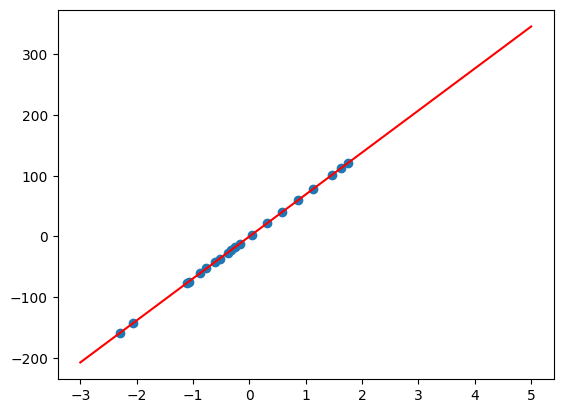

In [40]:
model3 = Model()
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']
steps, errors = model3.fit(x, y)

X0 = np.linspace(-3, 5, 100)
Y0 = model3.predict(X0)

plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()


Добавьте к классу модели метод рисования графиков. Сделайте так, чтобы он был независим от масштаба переданных данных.

In [41]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        self.made_steps = []
        self.count_errors = []
    def predict(self, X):
        return self.b0 + self.b1 * X.squeeze()
    def error(self, X, Y):
        X = X.squeeze()
        Y = Y.squeeze()
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.9, accuracy=0.01, max_steps=5000, error_step = 0.000001):
        steps, errors = [], []
        step = 0
        X = X.squeeze()
        Y = Y.squeeze()

        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)

            if errors:
              if errors[-1] - new_err < 0:
                alpha = 2*alpha
              elif abs(errors[-1] - new_err) <= error_step:
                self.made_steps = steps
                self.count_errors = errors
                return steps, errors
            if step >= max_steps:
              self.made_steps = steps
              self.count_errors = errors
              return steps, errors

            step += 1
            steps.append(step)
            errors.append(new_err)
        self.made_steps = steps
        self.count_errors = errors
        return steps, errors
    def plot_error(self, X, Y):
      X = X.squeeze()
      Y = Y.squeeze()
      X0 = np.linspace(min(X), max(X), 100)
      Y0 = self.predict(X0)
      plt.figure()
      plt.plot(self.made_steps, self.count_errors, 'g')
      plt.show()

    def plot_scatter_error(self, X, Y):
      X = X.squeeze()
      Y = Y.squeeze()
      X0 = np.linspace(min(X), max(X), 100)
      Y0 = self.predict(X0)

      plt.figure()
      plt.scatter(X, Y)
      plt.plot(X0, Y0, 'r')
      plt.show()



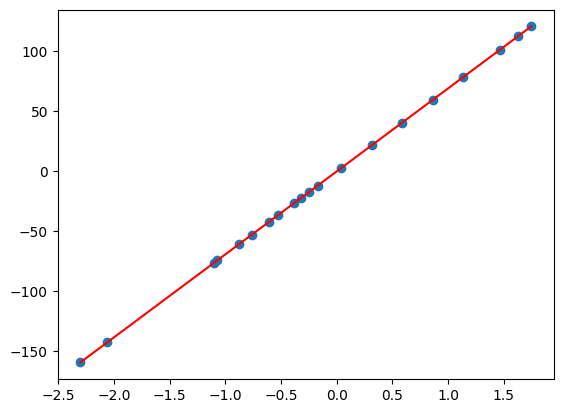

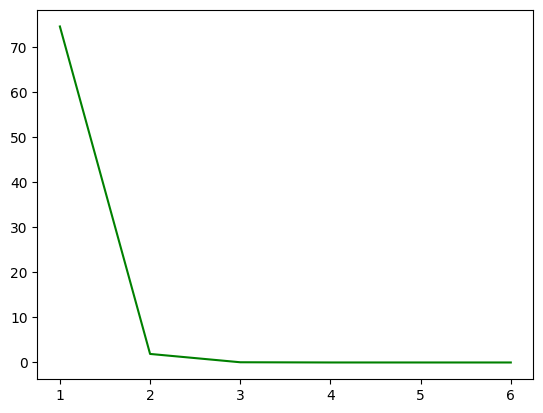

In [42]:
model3 = Model()
model3.fit(x, y)
model3.plot_scatter_error(x,y)
model3.plot_error(x, y)

In [7]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)
print(hyp.predict(10))

error after gradient descent: 2.3101647145272472e-10
691.8769986643466


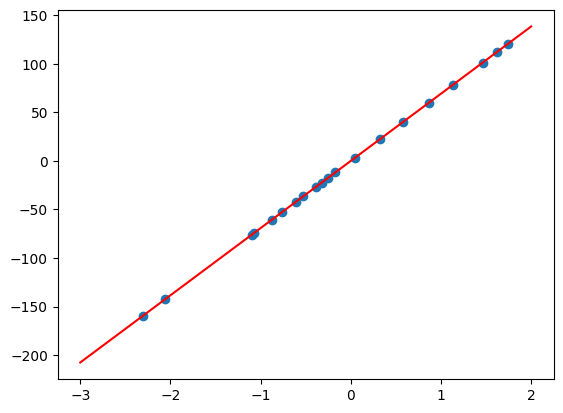

In [8]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()